### Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
sales_data = pd.read_csv(url)

### Visualizar as variaveis

In [3]:
sales_data.head(50)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


### Visualizar os dados

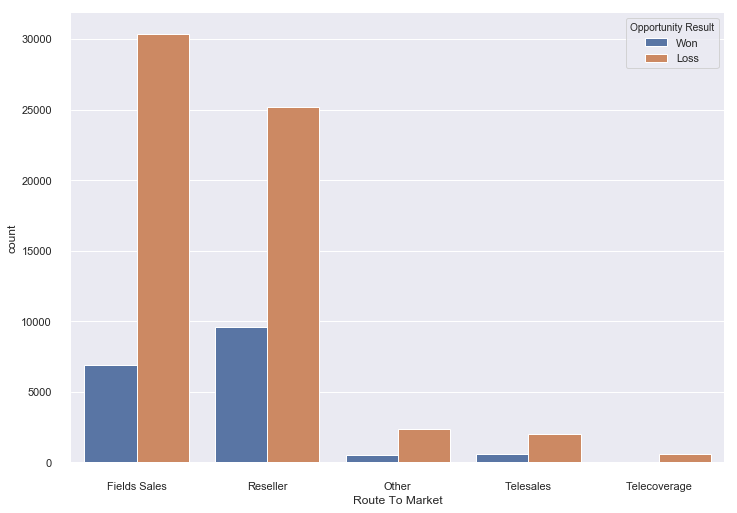

In [4]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

sns.despine(offset=10, trim=True)


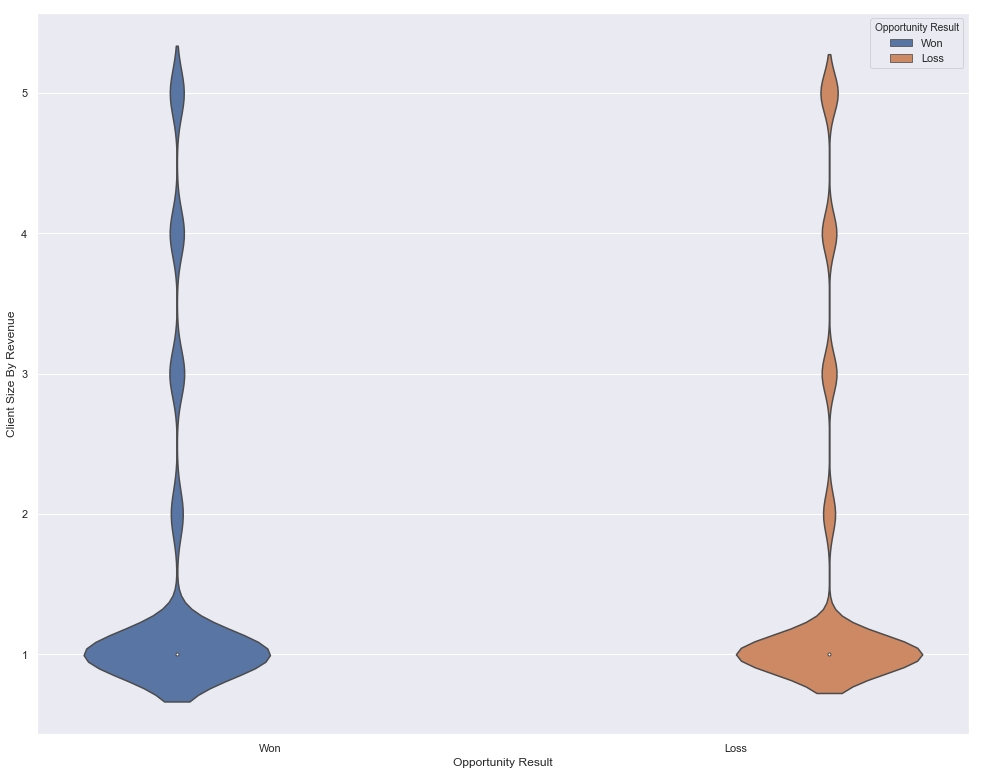

In [5]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()



### Converter as variaveis categoricas em numericas

In [6]:
le = LabelEncoder()

sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [7]:
numeric_features = sales_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Opportunity Number                           int64
Supplies Subgroup                            int32
Supplies Group                               int32
Region                                       int32
Route To Market                              int32
Elapsed Days In Sales Stage                  int64
Opportunity Result                           int32
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                              int32
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [8]:
corr = numeric_features.corr()

print (corr['Opportunity Result'].sort_values(ascending=False)[:10], '\n')
print (corr['Opportunity Result'].sort_values(ascending=False)[-10:])

Opportunity Result                    1.000000
Revenue From Client Past Two Years    0.277688
Ratio Days Qualified To Total Days    0.208131
Sales Stage Change Count              0.092017
Route To Market                       0.081942
Opportunity Number                    0.042167
Competitor Type                      -0.003661
Elapsed Days In Sales Stage          -0.016561
Client Size By Revenue               -0.017341
Client Size By Employee Count        -0.019456
Name: Opportunity Result, dtype: float64 

Client Size By Employee Count             -0.019456
Supplies Group                            -0.026049
Region                                    -0.030763
Supplies Subgroup                         -0.035639
Opportunity Amount USD                    -0.075764
Ratio Days Validated To Total Days        -0.172233
Deal Size Category                        -0.192270
Ratio Days Identified To Total Days       -0.201432
Total Days Identified Through Closing     -0.262864
Total Days Identifi

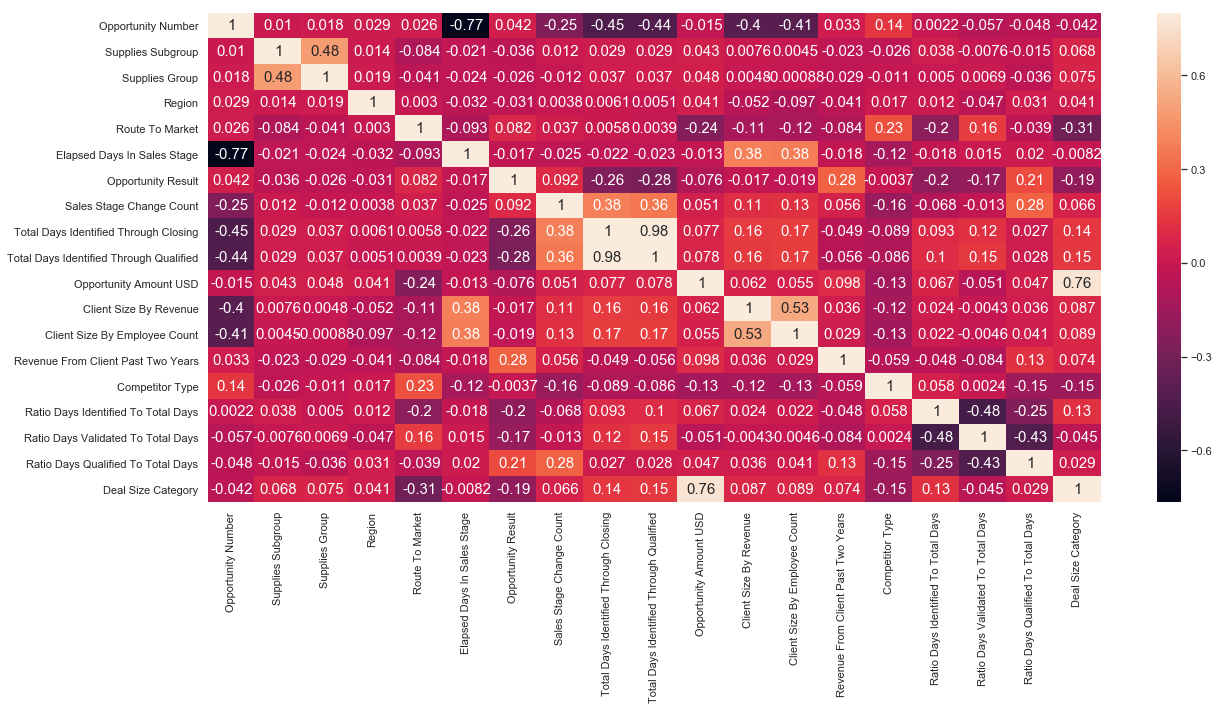

In [9]:
#correlacao matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 15}, annot=True);


### Training Set & Test Set

In [10]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

data = sales_data[cols]
target = sales_data['Opportunity Result']

data.head(2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


### Split data set into train and test

In [11]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

### Building  the model - Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)

#print(pred.tolist())

#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433
